# Run the GP optimizer in two dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz] # two degrees of freedom of the vertical KB mirror

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=4, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0   0.005753  0.238667  12.278202
1  -0.094247  0.016444  10.586794
2   0.055753 -0.316889  11.818407
3  -0.044247  0.349778  11.987702


We initialized the GP with the "quasi-random" strategy, as it doesn't require any prior data. But now that we have some points to work with, we can start to call some more sophisticated learning strategies. Let's try exploring the space ("explore"), and then try to aim for the best possible fitness ("exploit").

In [3]:
gpo.learn(n_iter=2, n_per_iter=2, strategy='explore', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=2, n_per_iter=2, strategy='exploit', greedy=True, reuse_hypers=False)

learning with strategy "explore" ...


   kbv_x_rot  kbv_offz    fitness
4   0.058512  0.389333        NaN
5  -0.041488  0.056000  11.439293


   kbv_x_rot  kbv_offz    fitness
6   0.080617 -0.016772   9.460059
7  -0.019383 -0.276032  12.177553
learning with strategy "exploit" ...


   kbv_x_rot  kbv_offz    fitness
8   0.009627 -0.205265  12.279992
9  -0.090373  0.128068  10.572485


    kbv_x_rot  kbv_offz    fitness
10    0.08315 -0.216871  11.098906
11   -0.01685  0.116462  12.212999


We can plot the "state" of the GPs, which shows their posteriors about the whole parameter space:

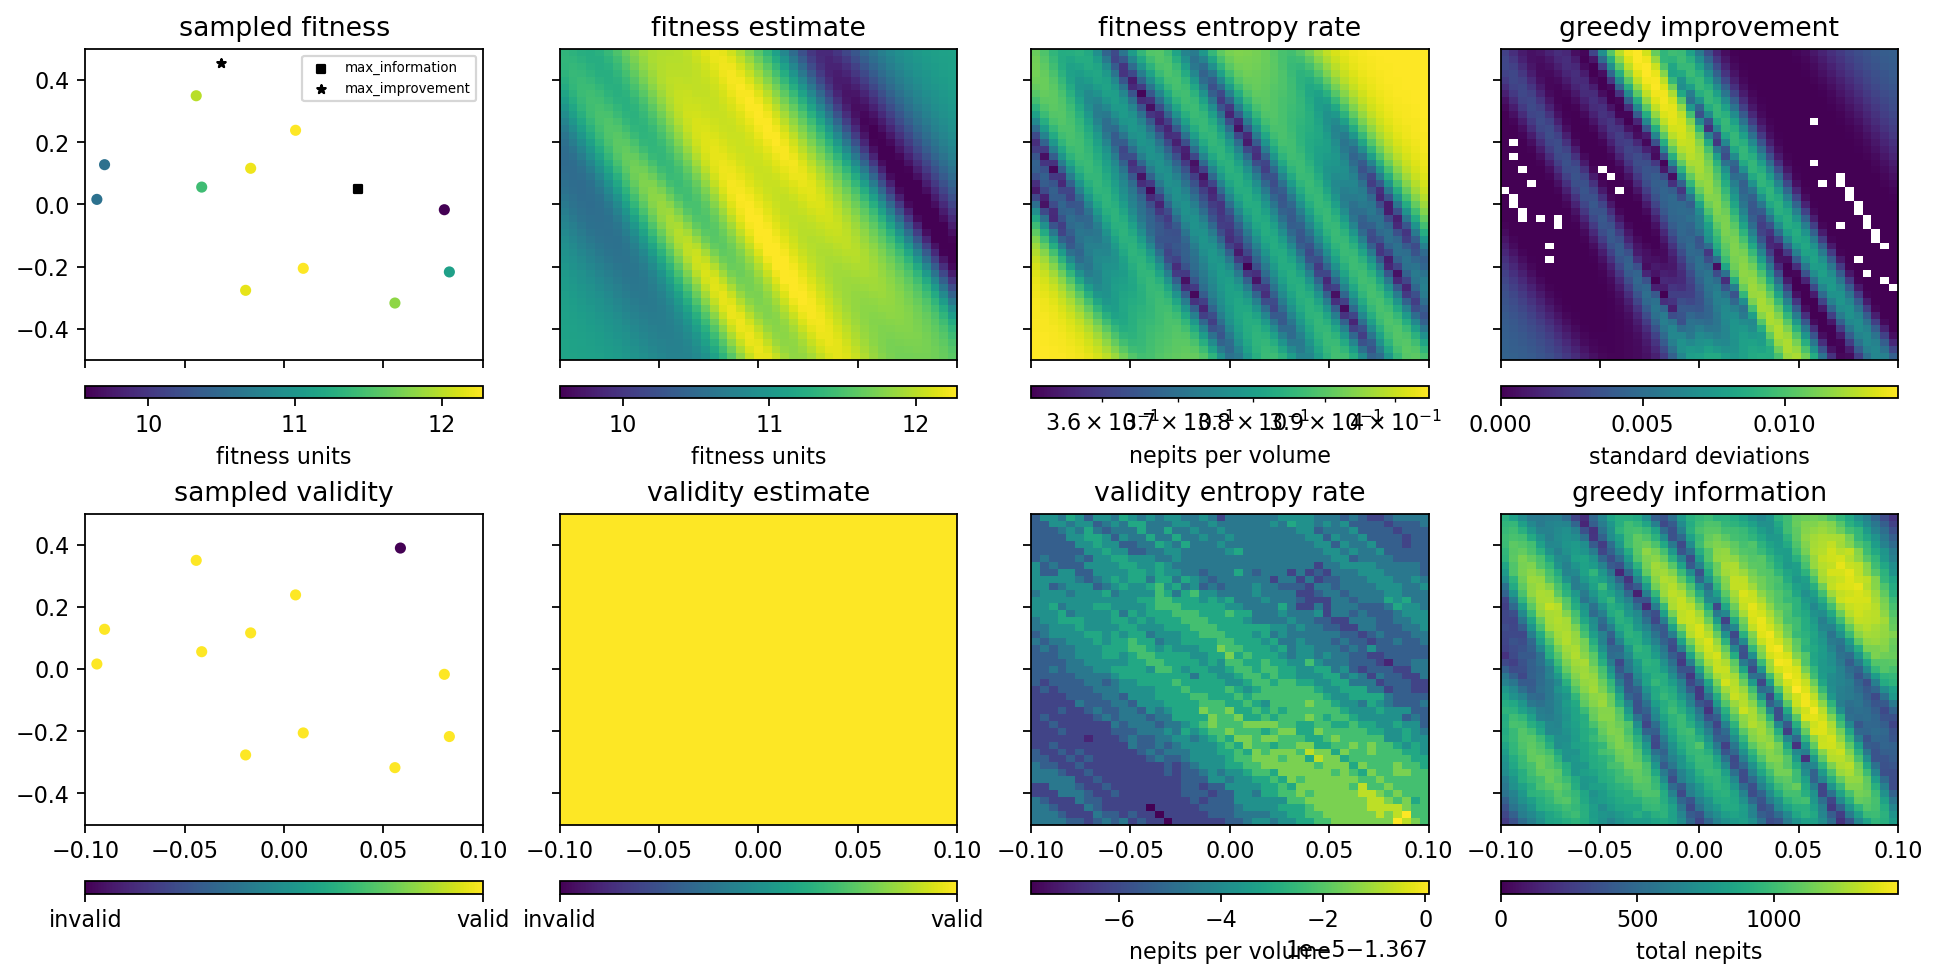

In [4]:
gpo.plot_state(gridded=True)

We can also plot the cumulative maximum fitness over time:

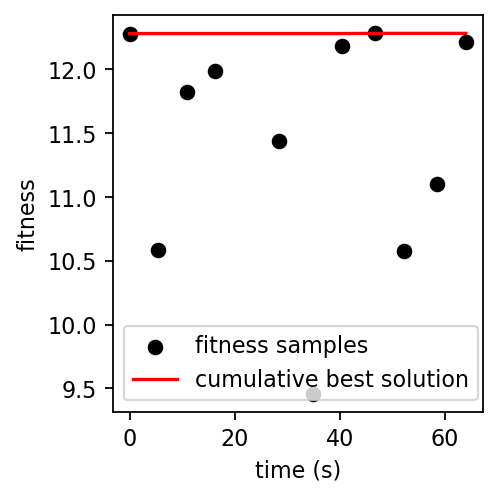

In [5]:
gpo.plot_fitness()